# Seaborn 
- 시각화 라이브러리

In [1]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 4.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [4]:
import seaborn as sn

In [7]:
import seaborn as sns
tips_df = sns.load_dataset("tips")
tips_df

# 여러분이 돈을 벌어야 해요. 많이 벌고 싶어요. 나는 학생이야.
# 팁을 좀 많이 받고 싶은데... 사장님이 데이터 주면서 => 언제 일하고 싶니?
# 나의 목표: 팁을 많이 받는 것.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
# 처음에 여러분은 뭘 해야하죠? 분석하기 위해서
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [12]:
tips_df.shape

(244, 7)

In [13]:
tips_df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [14]:
tips_df.index

RangeIndex(start=0, stop=244, step=1)

<Axes: >

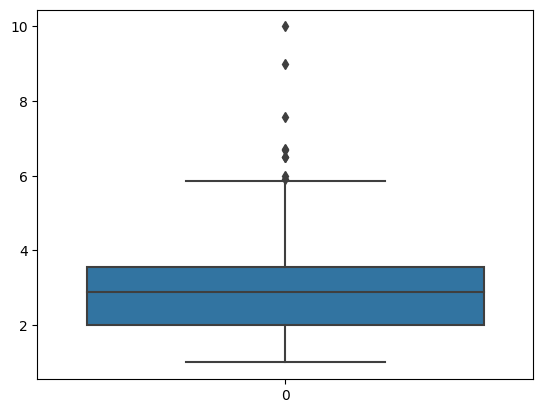

In [16]:
sns.boxplot(tips_df['tip'])

<Axes: xlabel='day', ylabel='total_bill'>

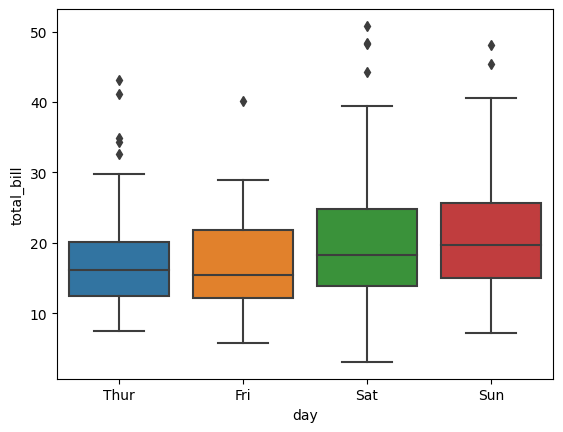

In [17]:
# total_bill이 높을 수록 => tip도 많이 받을 가능성이 높다.
# -total_bill이 높게 나오는 (1) 요일 (2) 성별 (3) 흡연여부

# 어느 요일에 매출이 잘 나올까?
sns.boxplot(x='day', y='total_bill', data=tips_df)

<Axes: xlabel='day', ylabel='total_bill'>

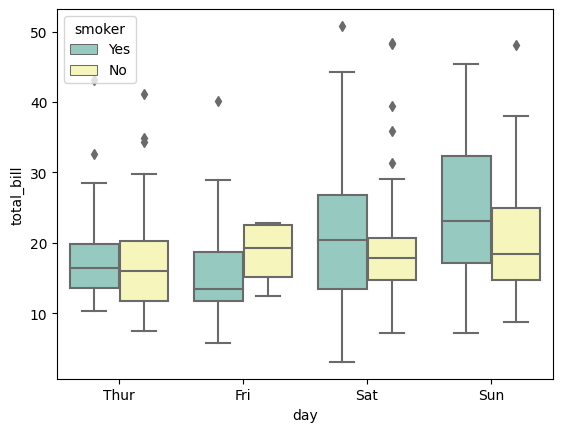

In [19]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue="smoker", palette="Set3")

<Axes: xlabel='day', ylabel='total_bill'>

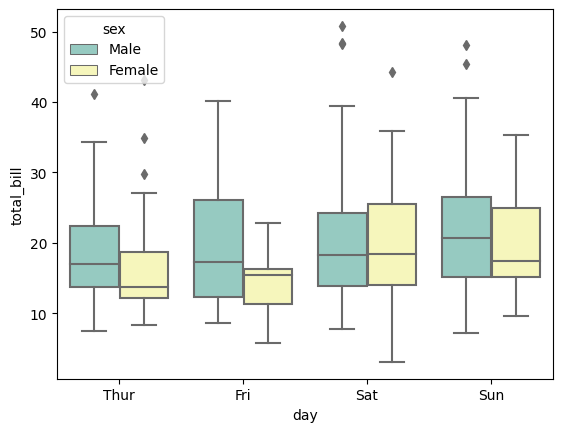

In [20]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue="sex", palette="Set3")

<Axes: xlabel='day', ylabel='total_bill'>

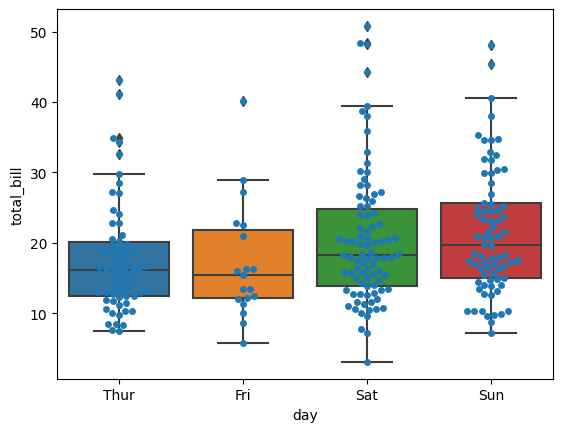

In [22]:
sns.boxplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(data=tips_df, x='day', y='total_bill')

In [23]:
# 나는 4시간만 일한다
# -경제적자유에 도달할 수 있는 단계가 나옵니다. (지침)

# 첫 번째 단계, 공간적 자유를 얻는 거에요.
# -9~6 있는게 아니라 => 집에서도 일할 수 있는 사람이 되는거.
# -회사에 들어갈 때 근무 시간도 협의를 했습니다. 
# -시간을 조절한다 / 저 주 2회는 재택하는 조건으로 계약하고 싶습니다. => '실력'
# 외주도 해야하고, 과외도 했고.. 
# 블로그에 개발자가 되고 싶은 사람들에게 과외를 해줬어요. -> 동시에 10명까지 했었는데.
# 생산성이 높아집니다. => 9 ~ 6시 일 안해도 되요. 오전만 하고 끝나는 일도 많던데??;;

<Axes: xlabel='day', ylabel='total_bill'>

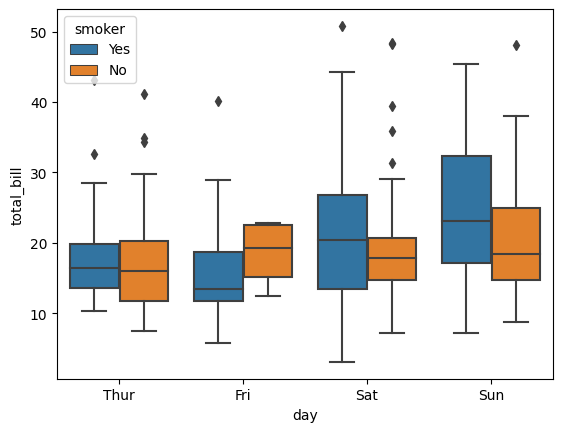

In [26]:
# sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='smoker')

### Lmplot (Linear Model Plot)
- 컬럼들간의 선형, 상관관계를 확인할 수 있는 그래프

*회귀분석(Regression Analysis)
- 독립변인이 종속변인에 영향을 미치는지 알아보고자 할 때 실시하는 분석방법

*상관관계
- -1~1 사이의 값을 갖는데요. 0에 가까울수록 두 변수는 관계가 없음을 나타냅니다.

ex)
- 키와 몸무게는 상관관계가 있는가 => 키가 클수록 몸무게도 많이 나가는가? => 1에 가까운 모습을 보여주겠죠.
- 한달에 읽는 책 권수와 경제적 자유는 상관관계인가? -> KB금융 부자리포트
- MBTI와 부자가 되는 것은 관계가 있는가?
- 테이블 전체 계산 금액이 높을수록 -> 팁도 많이 내는가?? (팁: label, 정답, 결과값)

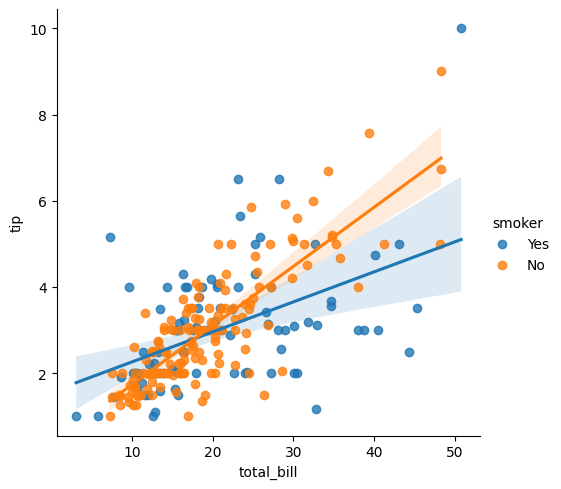

In [28]:
sns.lmplot(data=tips_df, x="total_bill", y="tip", hue='smoker') # y값이 종속변수가 되는 것.

### 비행기

In [30]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<Axes: xlabel='year', ylabel='month'>

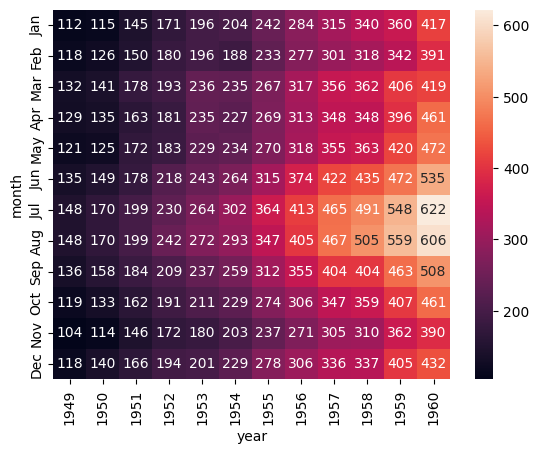

In [37]:
# flights.pivot(index='month', columns='year', values='passengers')
# flights = flights.pivot("month", "year", "passengers")

sns.heatmap(flights, annot=True, fmt="d") # fmt=format

### pairplot
- 각 컬럼(열)들 간의 상관 관계를 출력

In [38]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- Sepal Length:꽃받침의 길이 정보
- Sepal Width: 꽃받침의 너비 정보 
- Petal Length:꽃잎의 길이 정보 
- Petal Width:꽃잎의 너비 정보 

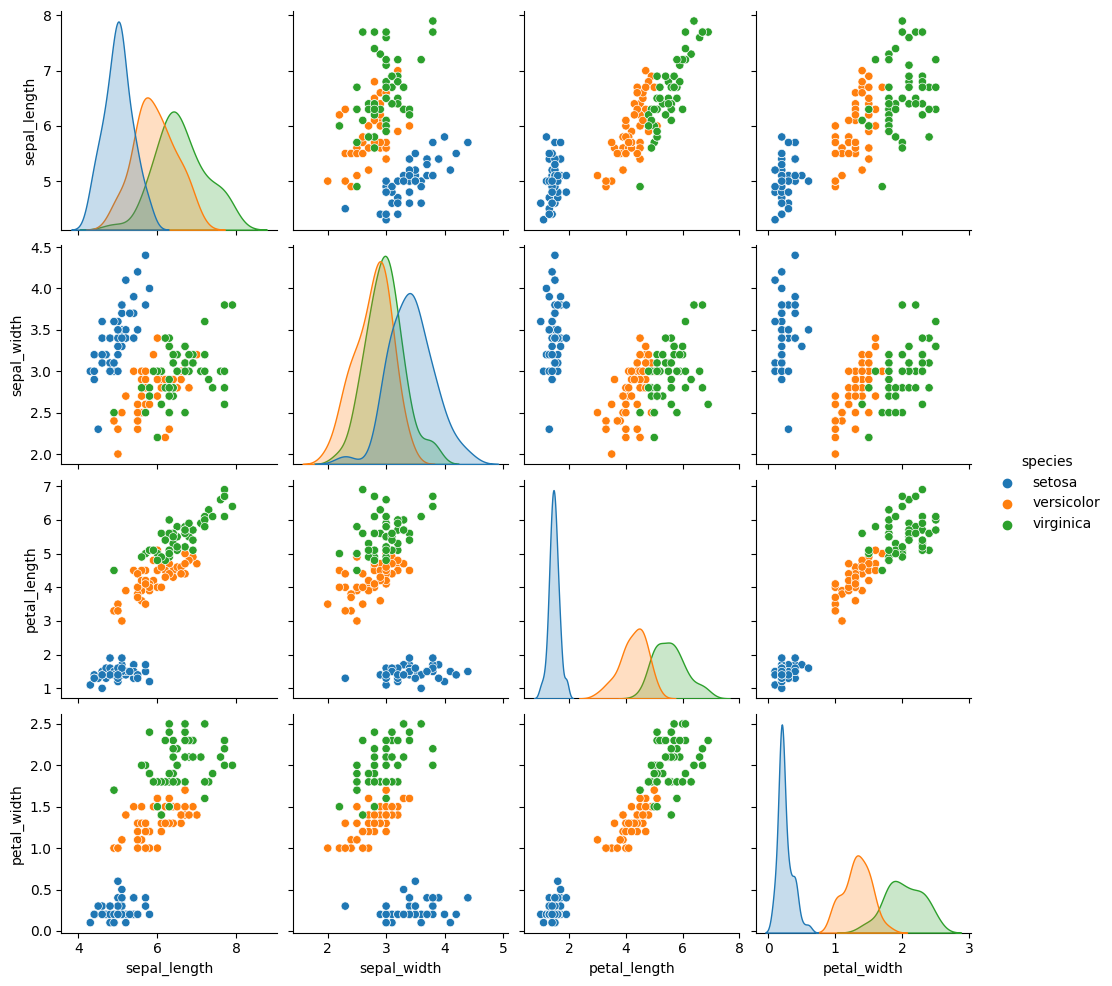

In [40]:
sns.pairplot(iris, hue="species")

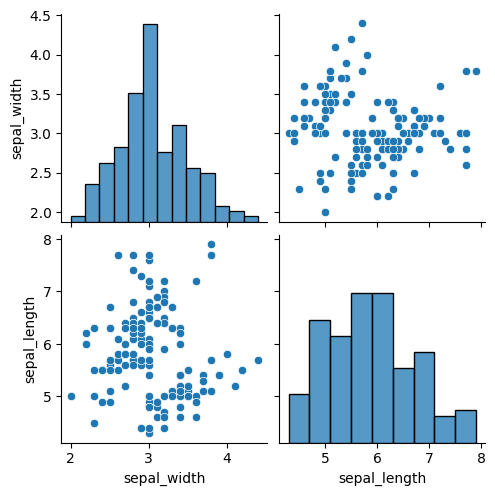

In [42]:
sns.pairplot(iris, vars=["sepal_width", "sepal_length"])

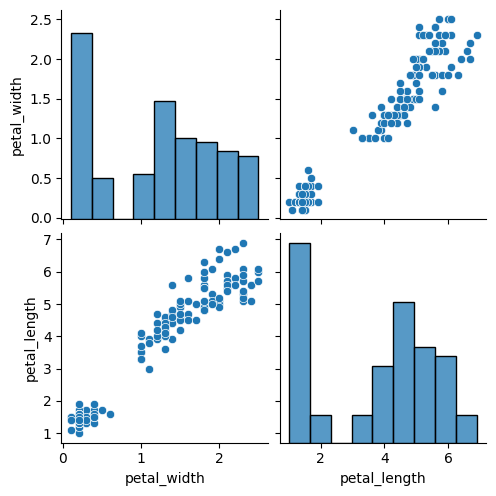

In [43]:
sns.pairplot(iris, vars=["petal_width", "petal_length"])

In [44]:
iris.corr()

/var/folders/yz/yncj9qh52mq6wk5p86v5p5lm0000gn/T/ipykernel_16132/2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


# 음의 상관관계 : -1에 가까울수록 (반대로, 반비례) 관계가 있다.
# 운동 횟수와 몸무게는 상관관계가 있나요? => 있죠. 운동 횟수가 증가할수록 -> 몸무게는?? 증가하나요?? 감소하죠.
# 고객 불만족이 높아질 수록 -> 매출은 감소한다. (음의 상관관계)

### Folium 
- 지도 시각화

In [45]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 15.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [46]:
import folium

In [49]:
folium.Map(location=[37.5488619, 127.1753687], zoom_start=15)

In [51]:
iris.select_dtypes(exclude=['object']).corr()

# iris.corr()
# 따라하다가 제가 뭘놓쳣는지  아래코드를 사용하면 
# 오류가 나고 위에코드를 사용해야 선생님처럼 같은값이 나오네요.
# ValueError: could not convert string to float: 'setosa'
# ValueError                                Traceback (most recent call last)
# Cell In[51], line 3
#       1 iris.select_dtypes(exclude=['object']).corr()
# ----> 3 iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [58]:
# iris.corr(numeric_only=True)
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [59]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 타이타닉

In [62]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/yz/yncj9qh52mq6wk5p86v5p5lm0000gn/T/ipykernel_16132/3113230484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins=10)


<Axes: xlabel='Age', ylabel='Density'>

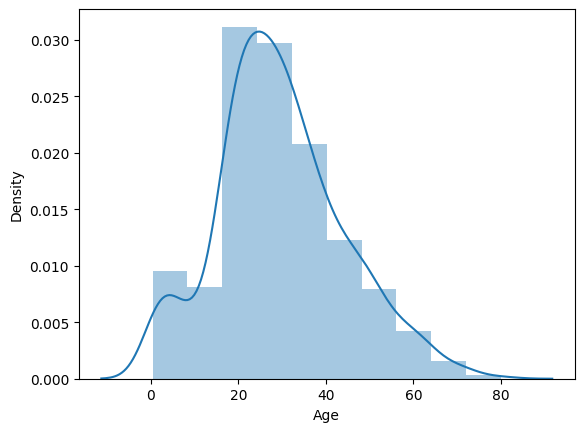

In [65]:
sns.distplot(df['Age'], bins=10)

<Axes: xlabel='Pclass', ylabel='count'>

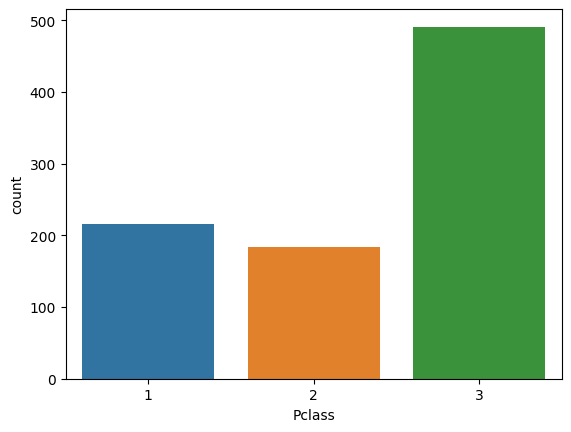

In [66]:
sns.countplot(x="Pclass", data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

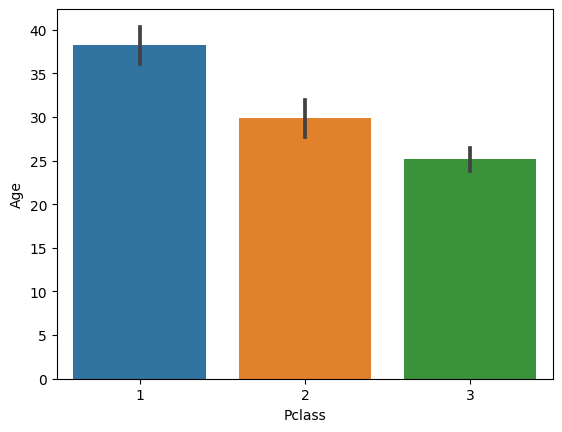

In [67]:
sns.barplot(x='Pclass', y='Age', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

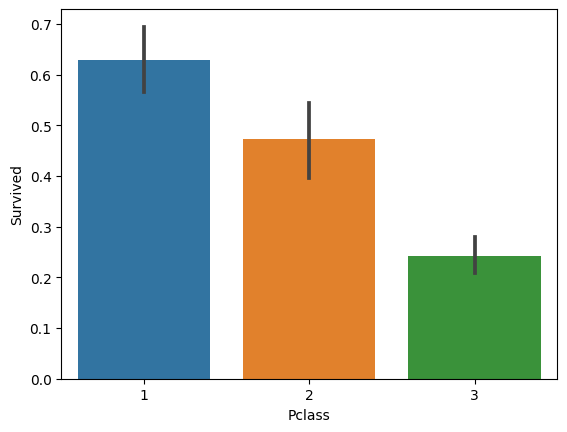

In [68]:
sns.barplot(x='Pclass', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

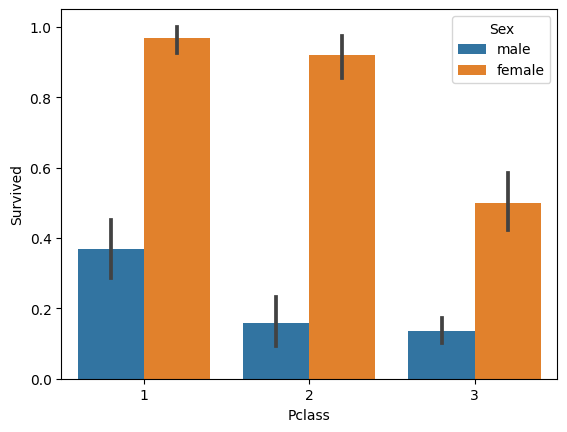

In [69]:
sns.barplot(x='Pclass', y='Survived', data=df, hue='Sex')

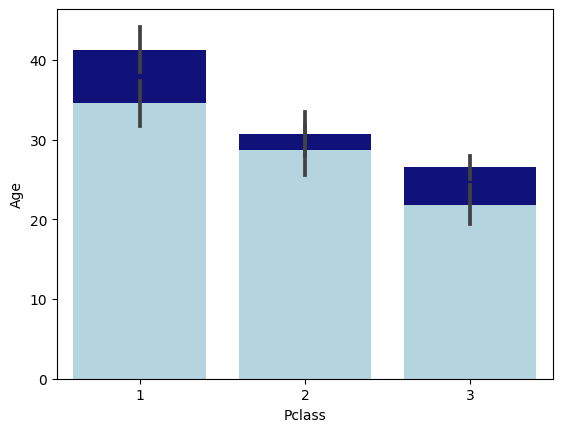

In [74]:
bar1 = sns.barplot(x="Pclass", y="Age", data=df[df['Sex']=="male"], color='darkblue')
bar2 = sns.barplot(x="Pclass", y="Age", data=df[df['Sex']=="female"], color='lightblue')

In [78]:
# 나이를 한번 구분해보겠습니다.

df['Age'].unique()

def set_age_category(age):
    category = ""

    if age <= 5:
        category = "baby"
    elif age <= 18:
        category = "student"
    elif age <= 30:
        category = "young adult"
    elif age <= 60:
        category = "adult"
    else:
        category = "elder"

    return category

df['Age_Category'] = df['Age'].apply(lambda x : set_age_category(x))

In [80]:
df[['Age','Age_Category']]

,Age,Age_Category
0,22.0,young adult
1,38.0,adult
2,26.0,young adult
3,35.0,adult
4,35.0,adult
...,...,...
886,27.0,young adult
887,19.0,young adult
888,NaN,elder
889,26.0,young adult


<Axes: xlabel='Age_Category', ylabel='Survived'>

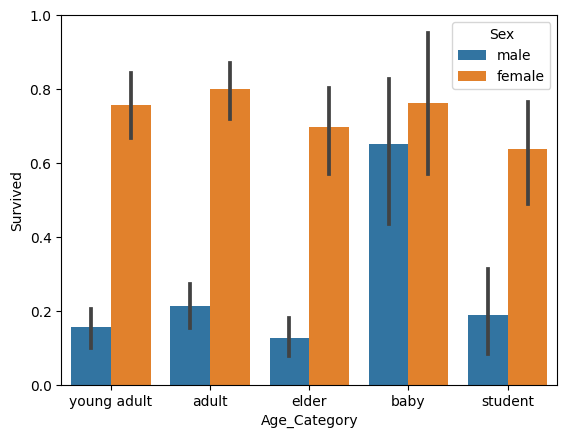

In [82]:
sns.barplot(x='Age_Category', y="Survived", data=df, hue="Sex")

<Axes: xlabel='Age_Category', ylabel='Survived'>

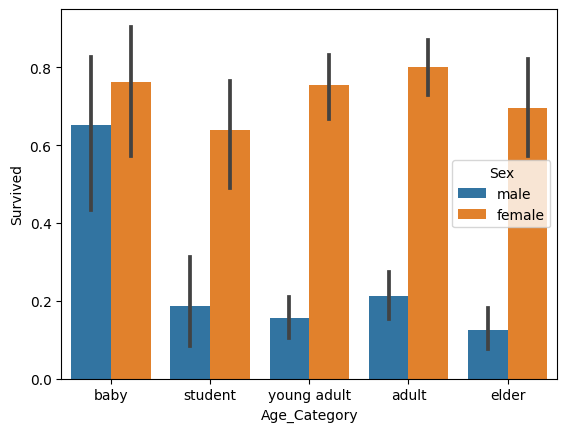

In [84]:
# sns.barplot(x='Age_Category', y="Survived", data=df, hue="Sex")
# 그래프에서 나이순으로 표현을 해주세요.

orders=['baby', 'student', 'young adult', 'adult', 'elder']
sns.barplot(data=df, x='Age_Category', y='Survived', hue='Sex', order=orders)

In [ ]:
# 남성과 여성별로 나이대의 생존 확률 분포도를 나타내시오.